In [42]:
import sklearn
import nltk
import praw
import json
import pprint
import pandas as pd
import numpy as np
import re
from io import StringIO     

In [43]:
import praw
reddit = praw.Reddit(client_id='d82BgeGuxFNBlA', client_secret='Ddi18K33GxZoIJLXGPkqTRZiO3o',
                    password='Rohit295', user_agent='redrohit295',
                    username='redrohit295')


In [44]:
list_of_items = []
fields = ['title','subreddit_id']

ritreddit = reddit.subreddit('rit')
for submission in ritreddit.top(limit=500):
    to_dict = vars(submission)
    sub_dict = {field: to_dict[field] for field in fields}
    list_of_items.append(sub_dict)

In [45]:
with open('ritdata500.json', 'w') as f:
    json.dump(list_of_items, f)

In [46]:
list_of_items = []
fields = ['title','subreddit_id']

ritreddit = reddit.subreddit('christmas')
for submission in ritreddit.top(limit=500):
    to_dict = vars(submission)
    sub_dict = {field: to_dict[field] for field in fields}
    list_of_items.append(sub_dict)

In [47]:
with open('christmasdata500.json', 'w') as f:
    json.dump(list_of_items, f)


In [48]:
import pandas as pd
ritfile = 'ritdata500.json'
with open(ritfile) as rit_file:
    rit_dict = json.load(rit_file)

# converting json dataset from dictionary to dataframe
rit_df = pd.DataFrame.from_dict(rit_dict)
rit_df.reset_index(level=0, inplace=True)

In [49]:
chritmasfile = 'christmasdata500.json'
with open(chritmasfile) as chritmas_file:
    christmas_dict = json.load(chritmas_file)

# converting json dataset from dictionary to dataframe
christmas_df = pd.DataFrame.from_dict(christmas_dict)
christmas_df.reset_index(level=0, inplace=True)

In [75]:
data_df = pd.concat([rit_df,christmas_df])
data_df

,index,subreddit_id,title
0,0,t5_2qh3x,Roommate showed us how to clean our dishes
1,1,t5_2qh3x,My friends and I cleaning up the nature trail!...
2,2,t5_2qh3x,when you're on a rit meal plan
3,3,t5_2qh3x,Shoutout to The Den for offering different typ...
4,4,t5_2qh3x,college_students@rit.edu
5,5,t5_2qh3x,"RIT, mental health is no joke."
6,6,t5_2qh3x,A fight today in the Infinity Quad
7,7,t5_2qh3x,Saw this on the RIT memes page on Facebook.
8,8,t5_2qh3x,I was having a real bad Monday til I saw this ...
9,9,t5_2qh3x,RIT’s Ideal Student


In [76]:
data_df = data_df.replace('t5_2qh3x',0)
data_df = data_df.replace('t5_2qi2n',1)

In [77]:
from sklearn.utils import shuffle
data_df = shuffle(data_df)
data_df

,index,subreddit_id,title
188,188,1,Anyone else still rocking full decorations thr...
50,50,1,"My wreath this morning, after a major snow storm."
322,322,1,All set up
254,254,1,You already know whats going on
377,377,0,The Tale of the 2 am Campo Crusade
113,113,1,February 2nd bitches.
213,213,1,Christmas Time At The Lodge
472,472,1,Peanuts Holiday Wallpaper #4 ❄️🎄🛷☃️🦌❄️
423,423,0,Please shower.
247,247,1,It's coming ( ͡° ͜ʖ ͡° )


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_df["title"], data_df["subreddit_id"], test_size=0.5, random_state=1)

X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(500, 1523)

In [80]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(500, 1523)

In [81]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),('tfidf', TfidfTransformer())])
text_clf = text_clf.fit(X_train, y_train)

In [82]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english')),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])
_ = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

C:\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.832

In [83]:
y_score = text_clf_svm.decision_function(X_test) 

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.94


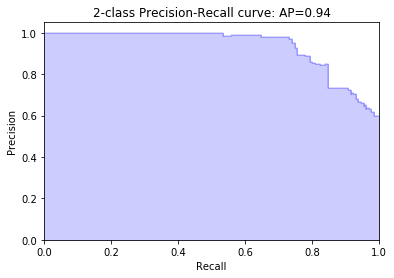

In [84]:
%matplotlib inline
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

plt.show()

In [85]:
wordcloud = pd.DataFrame(data_df["title"])
wordcloud["title"] = wordcloud["title"].map(lambda x: re.sub(r'\W+', ' ', x))
wordclouddf = pd.DataFrame(wordcloud["title"])
np.savetxt('wordcloud.txt', wordclouddf.values, fmt='%s', delimiter="\t", header="X\tY\tZ\tValue") 

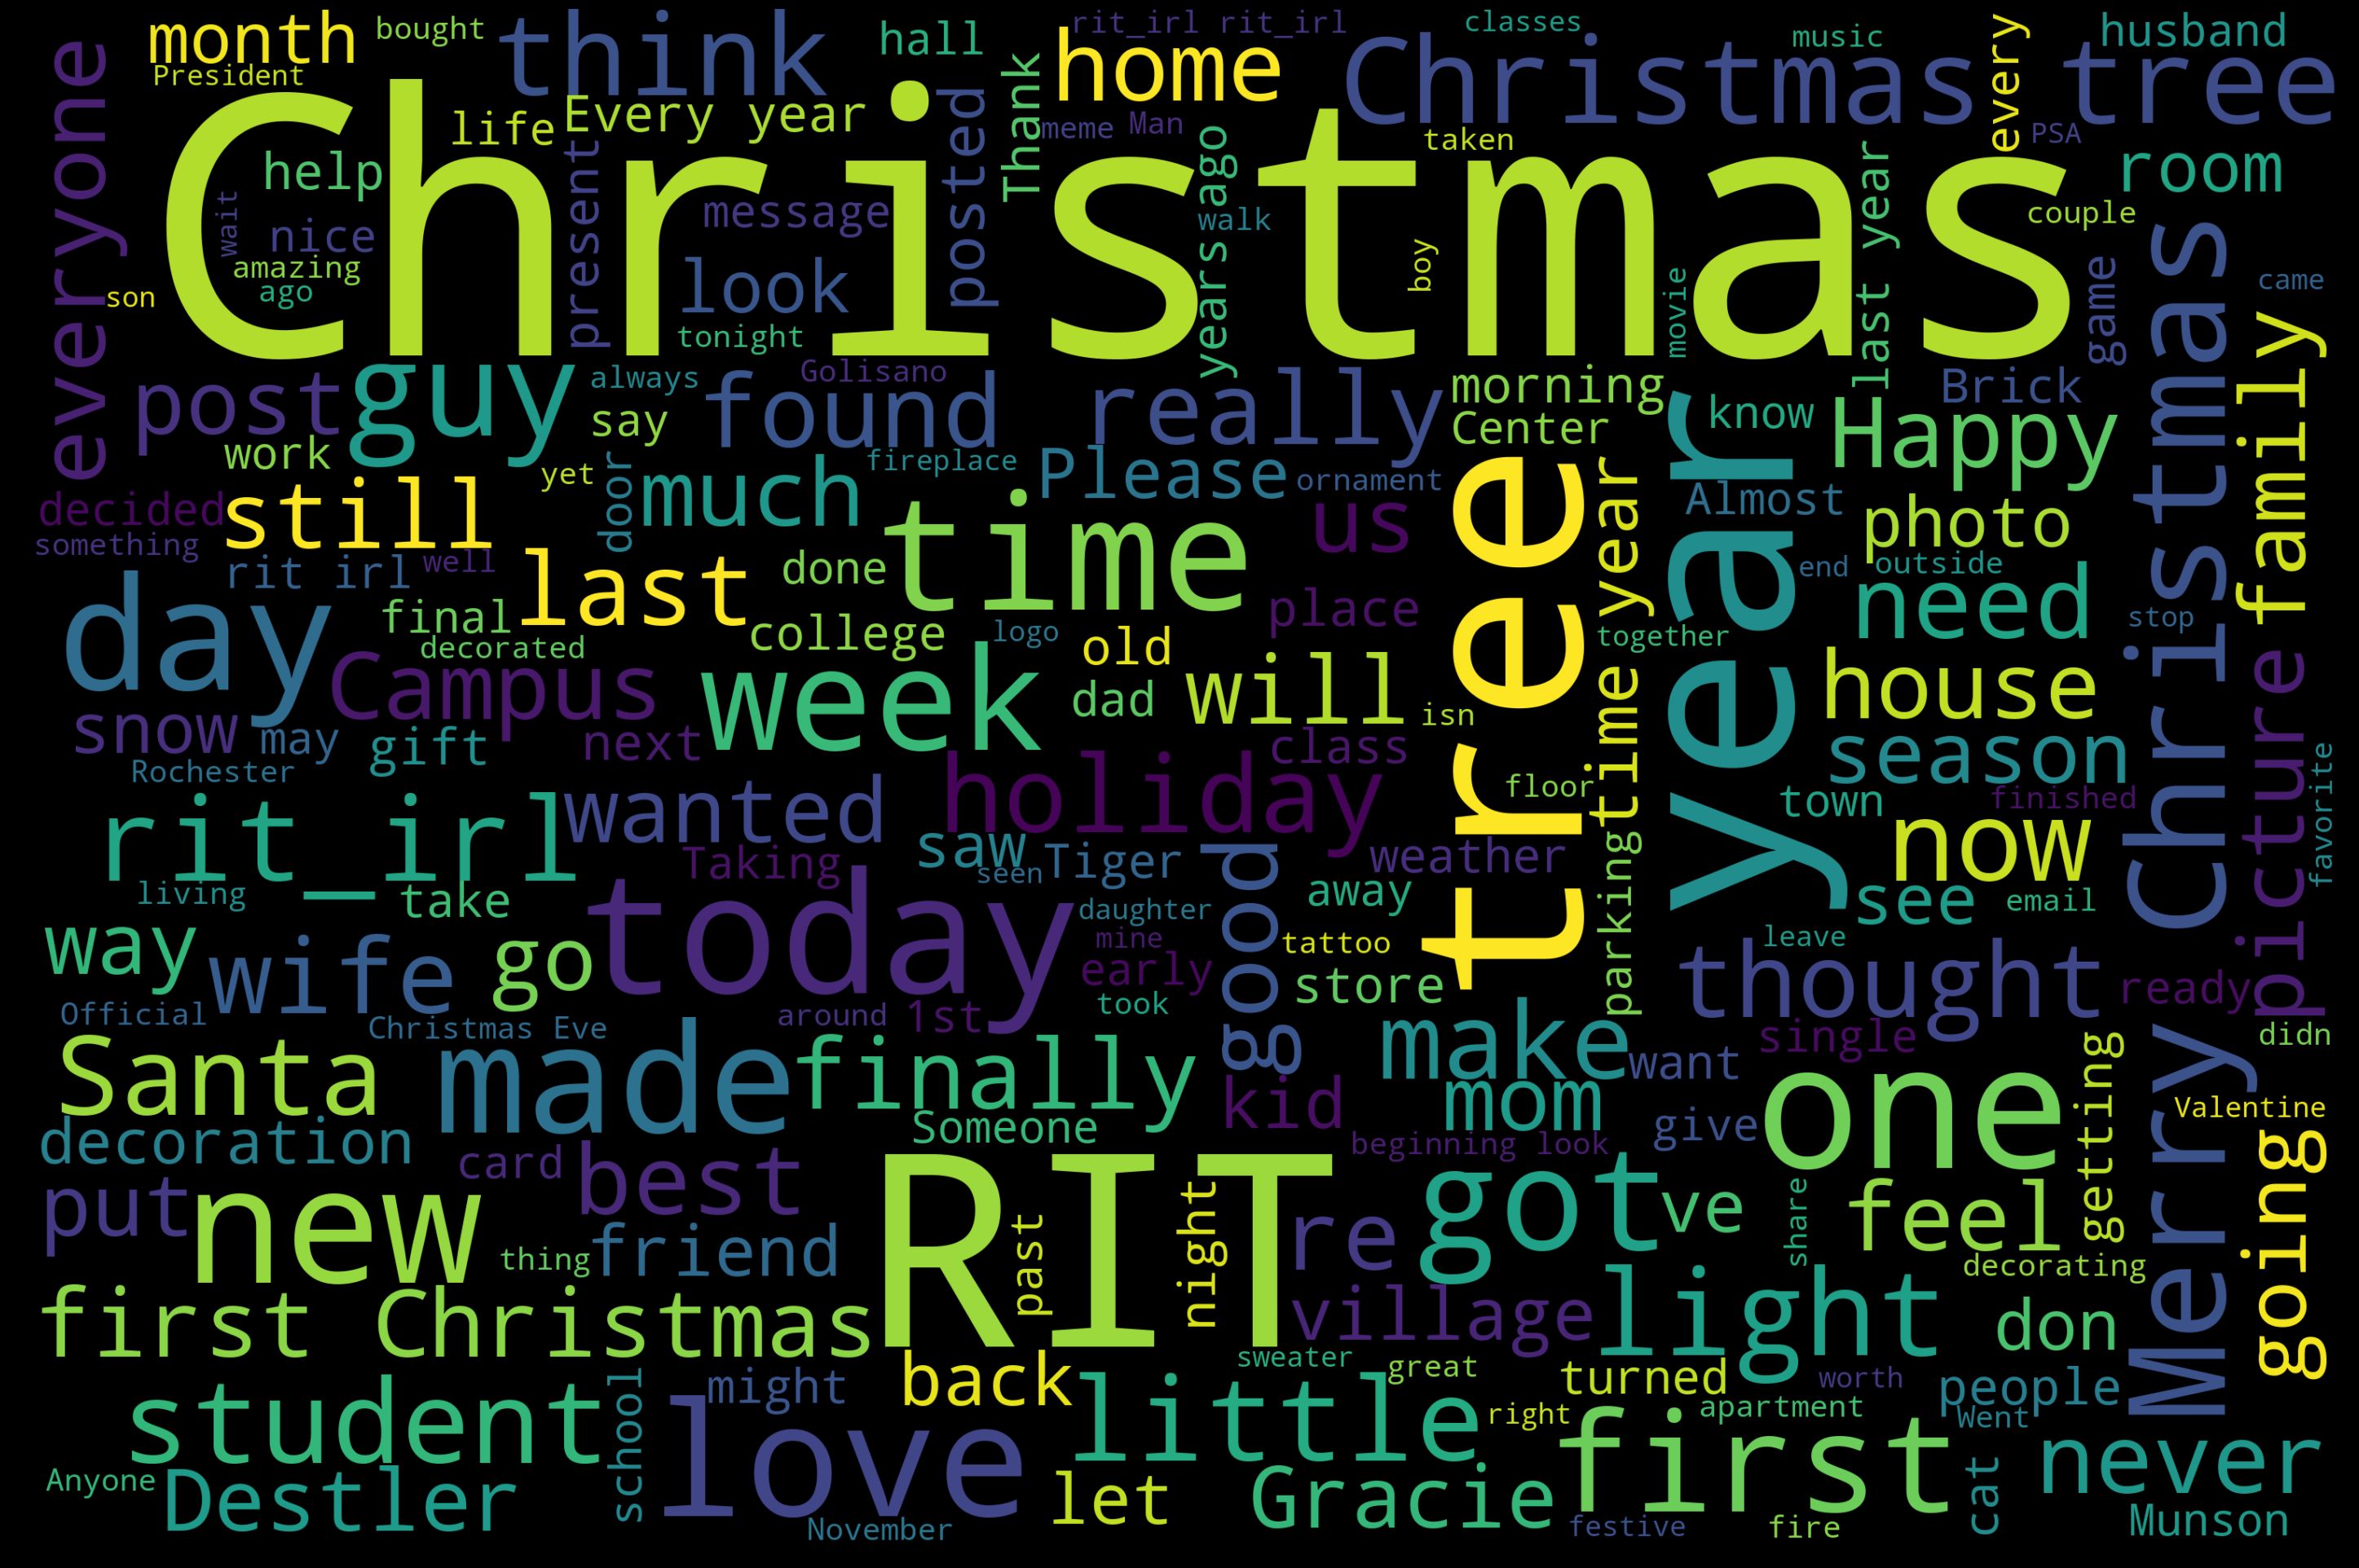

In [86]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'wordcloud.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# lower max_font_size
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [87]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(predicted_svm, y_test)

array([[109,  32],
       [ 10,  99]], dtype=int64)

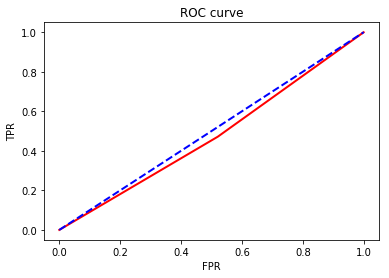

In [66]:
fpr, tpr,_=roc_curve(predicted_svm, y_test,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [67]:
roc_auc_score(predicted_svm, y_test)

0.47543238993710696